## The retirement gap

Data scource: OECD (Organisation for economic co-operation and development)
https://stats.oecd.org/index.aspx?queryid=54758

Hypothesis: The time it takes to retire is directly proportional to earnings. Thanks to pay gap, there must exist a retirement gap.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "data/GENDER_EMP_12032020154226565.csv"
data = pd.read_csv(url)
data.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,GBR,United Kingdom,EMP16,"Expected number of years in retirement, by sex",MEN,Men,TOTAL,Total,2010,2010,YR,Years,0,Units,NaN,NaN,18.9,NaN,NaN
1,GBR,United Kingdom,EMP16,"Expected number of years in retirement, by sex",MEN,Men,TOTAL,Total,2012,2012,YR,Years,0,Units,NaN,NaN,19.3,NaN,NaN
2,GBR,United Kingdom,EMP16,"Expected number of years in retirement, by sex",WOMEN,Women,TOTAL,Total,2010,2010,YR,Years,0,Units,NaN,NaN,23.4,NaN,NaN
3,GBR,United Kingdom,EMP16,"Expected number of years in retirement, by sex",WOMEN,Women,TOTAL,Total,2012,2012,YR,Years,0,Units,NaN,NaN,23.1,NaN,NaN
4,OAVG,OECD - Average,EMP16,"Expected number of years in retirement, by sex",MEN,Men,TOTAL,Total,2010,2010,YR,Years,0,Units,NaN,NaN,18.1,NaN,NaN


In [3]:
len(data)

132

In [4]:
data = data[["COU","Country","Sex","Time","Value"]]
data.head()

,COU,Country,Sex,Time,Value
0,GBR,United Kingdom,Men,2010,18.9
1,GBR,United Kingdom,Men,2012,19.3
2,GBR,United Kingdom,Women,2010,23.4
3,GBR,United Kingdom,Women,2012,23.1
4,OAVG,OECD - Average,Men,2010,18.1


In [5]:
uk_data = data.loc[data['COU'] == 'GBR']
uk_data.head()

,COU,Country,Sex,Time,Value
0,GBR,United Kingdom,Men,2010,18.9
1,GBR,United Kingdom,Men,2012,19.3
2,GBR,United Kingdom,Women,2010,23.4
3,GBR,United Kingdom,Women,2012,23.1
9,GBR,United Kingdom,Women,2014,23.1


In [24]:
# avg_data = data.loc[data['COU'] == 'OAVG']
# avg_data.head()

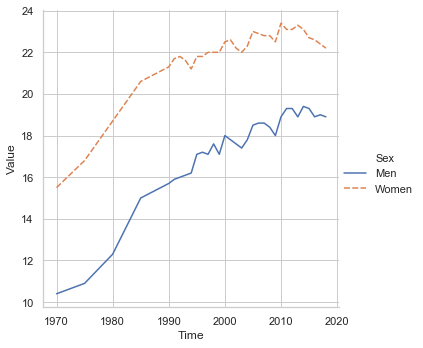

In [24]:
sns.set(style="whitegrid")
sns.relplot(x="Time", y="Value",
            hue="Sex", style="Sex",
            kind="line", data=uk_data);
# sns.relplot(x="Time", y="Value", hue="Sex",
#           data=uk_data);

Get year values for (women - men) for uk_data

In [25]:
# men_data = uk_data[uk_data['Sex'] == 'Men']
# men_data.set_index('Time', inplace=True)
# #men_data.sort_index()
# men_data.head()
# women_data = uk_data[uk_data['Sex'] == 'Women']
# women_data.set_index('Time', inplace=True)
# women_data.head()

In [10]:
new_uk_data = pd.pivot_table(uk_data, index=['Time'],
                        columns=['Sex'],values=['Value'])

In [11]:
new_uk_data.columns =[s2 for (s1,s2) in new_uk_data.columns.tolist()]

new_uk_data.head()

,Men,Women
Time,,
1970,10.4,15.5
1975,10.9,16.8
1980,12.3,18.7
1985,15.0,20.6
1990,15.7,21.3


In [27]:
new_uk_data['Gap'] = new_uk_data['Women'] - new_uk_data['Men']
new_uk_data.head()

,Men,Women,Gap
Time,,,
1970,10.4,15.5,5.1
1975,10.9,16.8,5.9
1980,12.3,18.7,6.4
1985,15.0,20.6,5.6
1990,15.7,21.3,5.6


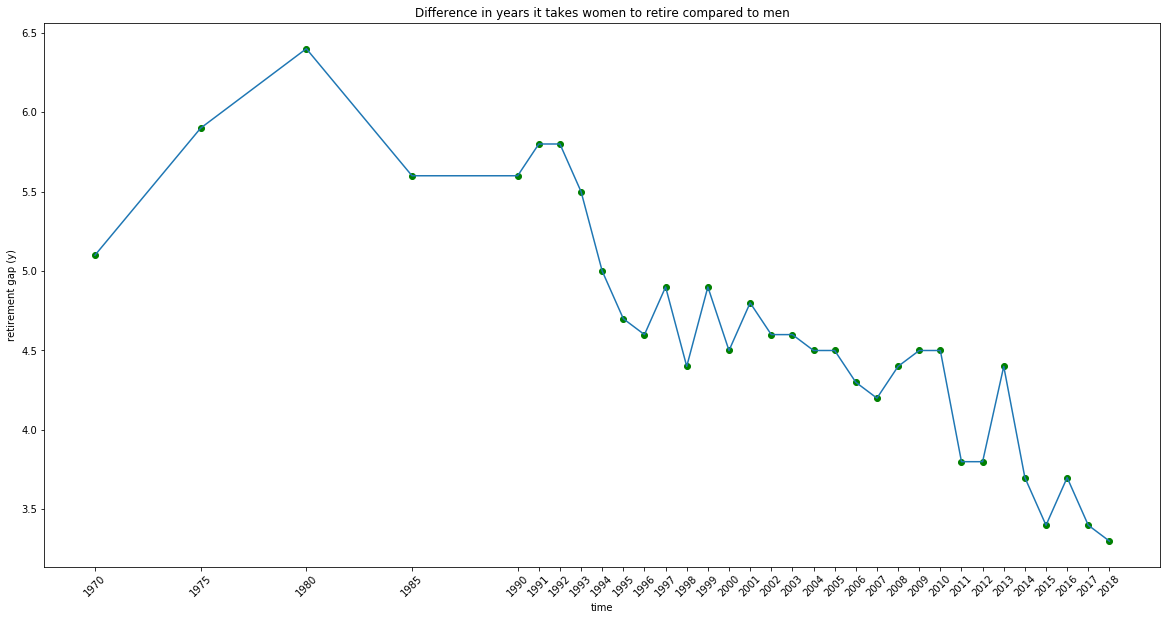

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(new_uk_data.index,new_uk_data['Gap'],c='green')
ax.plot(new_uk_data.index,new_uk_data['Gap'])
ax.set(xlabel='time', ylabel='retirement gap (y)',
       title='Difference in years it takes women to retire compared to men')
plt.xticks(new_uk_data.index, rotation='45')

plt.show()

Decreased but was never zero or negative :(

## Merging with gender pay gap data

Source https://stats.oecd.org/index.aspx?queryid=54751

In [29]:
url2 = "data/GENDER_EMP_12032020181255160.csv"
pg_data = pd.read_csv(url2)
pg_data.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,GBR,United Kingdom,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2000,2000,PC,Percentage,0,Units,NaN,NaN,26.3,NaN,NaN
1,GBR,United Kingdom,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2001,2001,PC,Percentage,0,Units,NaN,NaN,25.6,NaN,NaN
2,GBR,United Kingdom,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2002,2002,PC,Percentage,0,Units,NaN,NaN,24.4,NaN,NaN
3,GBR,United Kingdom,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2003,2003,PC,Percentage,0,Units,NaN,NaN,24.1,NaN,NaN
4,GBR,United Kingdom,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2004,2004,PC,Percentage,0,Units,NaN,NaN,23.4,NaN,NaN


In [30]:
pg_data = pg_data[["Time","Value"]]
pg_data.set_index('Time', inplace=True)
pg_data.rename(index={'Latest year':'2020'}, inplace=True)
#pg_data.head()

### TODO: get merge to merge 

In [31]:
mergedDf = pd.merge(new_uk_data,pg_data, left_index=True, right_index=True, how='outer')
# mergedDf

In [32]:
mergedDf['Retirement_gap'] = (mergedDf['Gap'] / mergedDf['Men']) * 100
mergedDf.rename(columns={ 'Value': 'Pay_gap'}, inplace=True)

In [33]:
mergedDf = mergedDf[['Retirement_gap','Pay_gap']]

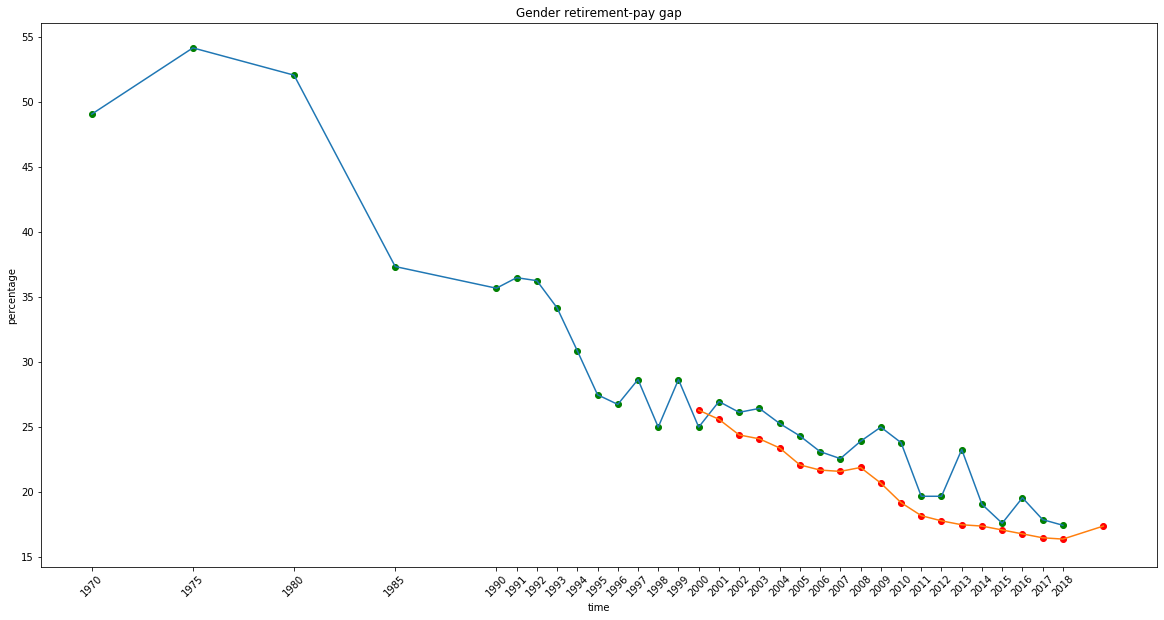

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(mergedDf.index,mergedDf['Retirement_gap'],c='green')
ax.scatter(mergedDf.index,mergedDf['Pay_gap'],c='red')
ax.plot(mergedDf.index,mergedDf['Retirement_gap'])
ax.plot(mergedDf.index,mergedDf['Pay_gap'])
ax.set(xlabel='time', ylabel='percentage',
       title='Gender retirement-pay gap')
plt.xticks(new_uk_data.index, rotation='45')

plt.show()

We can see a decreasing trend but it's not zero.

Extras:

Entrepreneurship  : Gender gap in self-employed earnings https://stats.oecd.org/index.aspx?queryid=54681
